In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



### Create Dataset

In [2]:
from src.dataset import SiameseDataset
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
    ])

train_dataset = SiameseDataset(
    "data/cropped_selected_split_data/train",
    transform = transform,
    max_positive_combinations=3,
    max_negative_combinations=3
    )

val_dataset = SiameseDataset(
    "data/cropped_selected_split_data/val",
    transform = transform,
    max_positive_combinations=3,
    max_negative_combinations=3
    )

test_dataset = SiameseDataset(
    "data/cropped_selected_split_data/test",
    transform = transform,
    max_positive_combinations=3,
    max_negative_combinations=3
    )

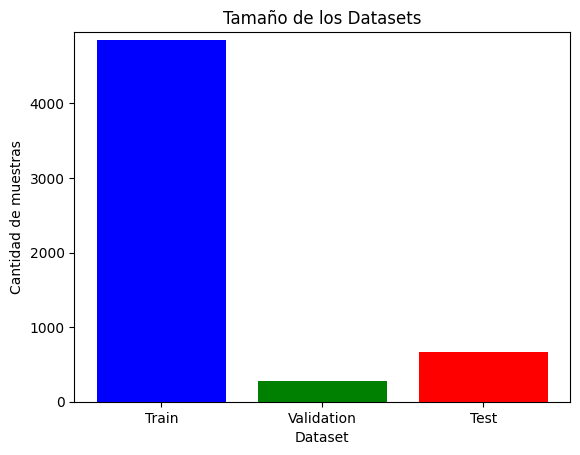

In [3]:
# Plot tamano del dataset:
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

labels = ['Train', 'Validation', 'Test']
sizes = [train_size, val_size, test_size]

plt.bar(labels, sizes, color=['blue', 'green', 'red'])
plt.title('Tamaño de los Datasets')
plt.xlabel('Dataset')
plt.ylabel('Cantidad de muestras')
plt.ylim(0, max(sizes) + 100) 
plt.show()

In [4]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=8)

test_loader = DataLoader(test_dataset, shuffle=True, batch_size=8)

val_loader = DataLoader(val_dataset, shuffle=True, batch_size=8)

### Define model

In [5]:
torch.cuda.empty_cache()

In [6]:
from src.models.simple_siamese_network import SimpleSiameseNetwork

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inicializar la red y la función de pérdida
model = SimpleSiameseNetwork().to(device)


In [7]:
from src.loss import ContrastiveLoss
import torch.optim as optim
import torch.nn as nn

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for img1, img2, label in train_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)

        # Adelante
        optimizer.zero_grad()
        prob = model(img1, img2)
        loss = criterion(prob, label)

        # Atrás
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 576.00 MiB (GPU 0; 3.81 GiB total capacity; 2.32 GiB already allocated; 230.69 MiB free; 3.48 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF